# Maximum Likelihood Estimation Introduction

**Learning Objectives:** Understand maximum likelihood estimation and hwo to use it to infer parameters of probability distributions.

## Imports

In [21]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

## Maximum likelihood

Previously, we have seen how to generate data from a probability distribution. Usually the underlying probability distribution depends on some parameters, such as $\mu$ and $\sigma$. For the purpose of this notebook, let's bundle up those parameters into a vector $\theta = [\theta_0, \theta_1, \ldots]$. The probability distribution for $x$, or probability density function, is usually denoted as:

$$P(x \mid \theta)$$

We expect this function to integrate to unity:

$$ \int P(x \mid \theta) dx = 1 $$

Now we want to flip things around and imagine that instead of starting with the parameters $\theta$ and generating data, we start with an array of data and want to find what value of $\theta$ best describes the underlying probability distribution. This is called *statistical inference*.

One approach for performing *inference* is called [maximum likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood). The foundation of this method is to interpret the above probability distribution in slightly different manner. Instead, we introduce the likelihood of a single data point $x$ as:

$$ \mathcal{L}(\theta \mid x) = P(x \mid \theta) $$

This is the *likelihood* of $\theta$ given our data $x$. For multiple, independent samples $[x_0, x_1, \ldots]$ the likelihood is simply the product:

$$ \mathcal{L}(\theta \mid x_0, x_1, \ldots) = \prod_i \mathcal{L}(\theta \mid x_i) = \prod_i P(x_i \mid \theta) $$

The maximum likelihood method consists of finding the value of $\theta$ that maximizes this likelihood $ \mathcal{L}(\theta \mid x_0, x_1, \ldots) $. It is often more natural to maximize the natural log of this function, or the *log-likelihood*:

$$ ln \mathcal{L}(\theta \mid x_0, x_1, \ldots) $$

Or, we can throw in a minus sign and *minimize the negative log-likelihood*:

$$ -ln \mathcal{L}(\theta \mid x_0, x_1, \ldots) $$

## MLE for the normal distribution

Let's see how MLE works for the normal distribution. The probability density function is:

$$ P(x \mid \mu,\sigma^2) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{\left[-\frac{(x-\mu)^2}{2 \sigma^2}\right]}$$

The log-liklihood for a single sample is then:

$$ ln \mathcal{L}(\mu,\sigma^2 \mid x) =  - \frac{1}{2} ln(2 \pi \sigma^2) - \frac{(x-\mu)^2}{2 \sigma^2} $$

For an array of values $[x_1, x_2, \ldots]$ the negative log-likelihood is then:

$$ -ln \mathcal{L}(\mu,\sigma^2 \mid x_1, x_2, \ldots) = \frac{n}{2} ln(2 \pi \sigma^2) + \frac{1}{2 \sigma^2}\sum_{i=1}^n (x_i-\mu)^2 $$

This is the function we need to minimize to find our estimates $\hat{\mu}$ and $\hat{\sigma}^2$.

In [8]:
mu = 5.0
sigma2 = 4.0
data = np.random.normal(5.0, np.sqrt(sigma2), 100)

Here is our distribution of generated data:

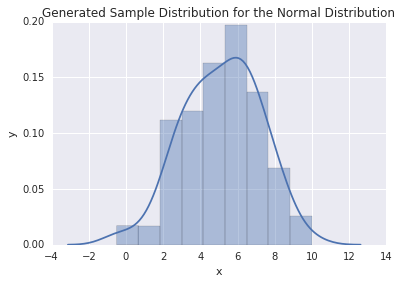

In [9]:
sns.distplot(data)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Generated Sample Distribution for the Normal Distribution');

In [10]:
def neg_log_llh(theta, data):
    """Return the negative log-likelihood for the normal distribution.
    
    Parameters
    ----------
    theta: tuple
        The parameters [mu, sigma**2] of the normal distribution.
    data: ndarra
        An array of data points that are being modelled by the normal distribution.
    """
    mu = theta[0]
    sigma2 = theta[1]
    n = len(data)
    result = 0.5*n*np.log(2.0*np.pi*sigma2) + (1.0/(2.0*sigma2))*np.sum((data-mu)**2)
    return result

In [11]:
neg_log_llh([1.0,1.0], data)

1158.9062510693452

Let's try to minimize this by hand using `interact`:

In [12]:
from ipywidgets import interact

In [15]:
def print_log_llh(mu, sigma2):
    print(neg_log_llh((mu, sigma2), data))

In [16]:
interact(print_log_llh, mu=(-10.0, 10.0, 0.1), sigma2=(0.1, 10.0, 0.1));

488.82257696


Now let's try to confirm this result by minimizing the negative log-likelihood numerically:

In [18]:
from scipy import optimize
fit = optimize.minimize(lambda theta: neg_log_llh(theta, data), [2.0,2.0])
fit

      jac: array([  1.90734863e-06,   0.00000000e+00])
     nfev: 72
  message: 'Optimization terminated successfully.'
      fun: 214.21516112557876
        x: array([ 5.13428864,  4.24790602])
      nit: 13
     njev: 18
   status: 0
 hess_inv: array([[ 0.04347732, -0.00331034],
       [-0.00331034,  0.37047071]])
  success: True

The estimated parameters are stored in the `x` attribute of the result:

In [19]:
print('mu:       ', fit.x[0])
print('sigma**2: ', fit.x[1])

mu:        5.13428864212
sigma**2:  4.2479060237


For the case of the normal distribution, these values closely match the sample mean and variance:

In [20]:
print('sample mu:      ', data.mean())
print('sample sigma**2:', data.var())

sample mu:       5.13428856673
sample sigma**2: 4.24790600199
